In order to successfully complete this assignment you need to:
1. Participate both individually and in groups during class.
2. Submit this notebook to the `exercise` folder in your `cmse802-yourlastname` repository by 10pm __the SAME DAY of the class__. Late assignment will receive <=80% of the grade.

### <p style="text-align: left;"> &#9989; Put your name here: Pavan Yachamaneni</p>

# __Artificial Neural Network 3: In-Class__

<img src= "https://editor.analyticsvidhya.com/uploads/58182variations_comparison.png" width="50%">

From: [www.analyticsvidhya.co](https://www.analyticsvidhya.com/blog/2022/07/gradient-descent-and-its-types/)

## Learning objectives

At the end of the exercise, you should be able to improve models by:
- Creating alternative network architecture.
- Using different approaches to initialize weights,
- Choosing learning rates,
- Applying batch normalization,
- Explore different activation functions,
- Applying different optmiziers for finding weights.

## Outline

1. [Review pre-class assignment](#preclass)
1. [Changing network architecture](#architecture)
1. [Tuning other hyperparameters](#tuning)
1. [Putting things together](#together)

----
<a name="preclass"></a>

# 1. Pre-Class Assignment Review

In your group, discussion the following.

&#9989; <font color=red>**QUESTION:**</font> Did you get stuck doing pre-class exercise or find some ideas confusing? If so where did you get stuck? What did you find confusing? What solutions did your groupmates suggest?

<font size=+3>&#9998;</font> All questions were answered.

---
<a name="architecture"></a>
# 2. Implementing Stochastic Gradient Descent

## 2.1 Base model

In the 2end ANN session, we build a classification model for the Fashion MNIST dataset. 


&#9989; **<font color=blue>DO THIS:</font>** Get the data ready, note that insteading of using only 2000 training data, we're going to use 10,000 training data this time!

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision.datasets as datasets
from torchvision import transforms
fashion_train_data  =  datasets.FashionMNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
fashion_test_data  =  datasets.FashionMNIST(root='./data', train=False, download=True, transform=None)
import torch
X_train_full = fashion_train_data.data
y_train_full = fashion_train_data.targets
X_test = fashion_test_data.data
y_test = fashion_test_data.targets
X_train = X_train_full[:10000]/255
X_valid = X_train_full[10000:10500]/255 
y_train = y_train_full[:10000]
y_valid = y_train_full[10000:10500]

In [2]:
X_train_full.size()

torch.Size([60000, 28, 28])

&#9989; **<font color=blue>DO THIS:</font>** Below is the base ANN and the test function we used the previous two classes. Run the following cell to load them.

In [4]:
import torch.nn as nn
import torch.nn.functional as F
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,1000)
        self.fc2 = nn.Linear(1000,100)
        self.fc3 = nn.Linear(100,10)
    
        
    def forward(self,x):
        x = x.view(x.shape[0],-1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(x,dim=1)
        return x
    
def model_evaluate(net, X_test,y_test):
      pred = net(X_test.float())
      corrects = 0
      for i in range(len(pred)):
            pred_label = pred[i].argmax()
            if pred_label == y_test[i]:
                corrects += 1
      return corrects/len(pred)


Put your answer here

&#9989; **<font color=blue>DO THIS:</font>** : The following implement mini-batch gradient descent, where in each iteration, we use only a mini-batch (aka. a subset) of the training data to compute the gradient. Comment on the lines as indicated.

In [7]:
net = Classifier()    
import torch.optim as optim
criterion = torch.nn.NLLLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9)
epochs = 200
batch_size = 200  # what does this line do?
n_batch = int(10000/batch_size)
net.train()
for e in range(epochs):
    running_loss = 0  # what does this line do?
    for i in range(1,n_batch):
       optimizer.zero_grad()
       pred = net(X_train[i*batch_size:(i+1)*batch_size]) # what does this line do?
       loss = criterion(pred,y_train[i*batch_size:(i+1)*batch_size]) # what does this line do?
       loss.backward()
       optimizer.step()
       running_loss += loss.item() # what does this line do?
    print('Epoch: {} \t Training loss: {:.6f}'.format(e,running_loss))

Epoch: 0 	 Training loss: 70.896866
Epoch: 1 	 Training loss: 40.147850
Epoch: 2 	 Training loss: 35.505356
Epoch: 3 	 Training loss: 33.428418
Epoch: 4 	 Training loss: 31.670586
Epoch: 5 	 Training loss: 29.443132
Epoch: 6 	 Training loss: 28.669896
Epoch: 7 	 Training loss: 27.819636
Epoch: 8 	 Training loss: 26.792471
Epoch: 9 	 Training loss: 25.815495
Epoch: 10 	 Training loss: 25.432122
Epoch: 11 	 Training loss: 25.404951
Epoch: 12 	 Training loss: 24.851765
Epoch: 13 	 Training loss: 24.952111
Epoch: 14 	 Training loss: 24.750280
Epoch: 15 	 Training loss: 23.465556
Epoch: 16 	 Training loss: 22.944961
Epoch: 17 	 Training loss: 23.043544
Epoch: 18 	 Training loss: 22.298200
Epoch: 19 	 Training loss: 22.194981
Epoch: 20 	 Training loss: 21.981696
Epoch: 21 	 Training loss: 21.646671
Epoch: 22 	 Training loss: 21.840587
Epoch: 23 	 Training loss: 21.781290
Epoch: 24 	 Training loss: 21.019205
Epoch: 25 	 Training loss: 20.469431
Epoch: 26 	 Training loss: 21.778206
Epoch: 27 	

In [34]:
model_evaluate(net, X_test, y_test)

0.8126

&#9989; **<font color=blue>DO THIS:</font>** : In the above training, the mini-batch is chosen in a derterministic way. We can  modified the code so that they are chosen randomly.

In [8]:
net = Classifier()    
criterion = torch.nn.NLLLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9)
epochs = 200
batch_size = 200 
n_batch = int(10000/batch_size)
net.train()
for e in range(epochs):
    running_loss = 0  # what does this line do?
    for i in range(1,n_batch):
       optimizer.zero_grad()
       random_ind = np.random.randint(0, 10000, batch_size) 
       pred = net(X_train[random_ind]) # what does this line do?
       loss = criterion(pred,y_train[random_ind]) # what does this line do?
       loss.backward()
       optimizer.step()
       running_loss += loss.item() # what does this line do?
    print('Epoch: {} \t Training loss: {:.6f}'.format(e,running_loss))

Epoch: 0 	 Training loss: 88.275056
Epoch: 1 	 Training loss: 56.939151
Epoch: 2 	 Training loss: 53.003400
Epoch: 3 	 Training loss: 49.635218
Epoch: 4 	 Training loss: 49.947606
Epoch: 5 	 Training loss: 48.681576
Epoch: 6 	 Training loss: 48.910472
Epoch: 7 	 Training loss: 48.587171
Epoch: 8 	 Training loss: 46.950635
Epoch: 9 	 Training loss: 46.219728
Epoch: 10 	 Training loss: 45.269614
Epoch: 11 	 Training loss: 44.508489
Epoch: 12 	 Training loss: 40.925265
Epoch: 13 	 Training loss: 37.590738
Epoch: 14 	 Training loss: 38.305070
Epoch: 15 	 Training loss: 37.236914
Epoch: 16 	 Training loss: 36.411839
Epoch: 17 	 Training loss: 36.347933
Epoch: 18 	 Training loss: 35.853594
Epoch: 19 	 Training loss: 36.770652
Epoch: 20 	 Training loss: 34.423271
Epoch: 21 	 Training loss: 33.960036
Epoch: 22 	 Training loss: 33.973065
Epoch: 23 	 Training loss: 26.011640
Epoch: 24 	 Training loss: 23.955898
Epoch: 25 	 Training loss: 23.869506
Epoch: 26 	 Training loss: 24.211576
Epoch: 27 	

In [32]:
model_evaluate(net, X_test,y_test)

0.6443

&#9989; **<font color=blue>DO THIS:</font>** The test performance is not that great considering we used almost all the training data. To further improvement the performance, please modify the above code to incorporate the early stopping stratigy we learnt last time. 

In [55]:
#Put your code here
net = Classifier()    
import torch.optim as optim
criterion = torch.nn.NLLLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9)
epochs = 200
batch_size = 200  # what does this line do?
n_batch = int(10000/batch_size)
net.train()
train_history = []
best_loss = 1e3
early_stopping = 0
for e in range(epochs):
    running_loss = 0  # what does this line do?
    for i in range(1,n_batch):
       optimizer.zero_grad()
       pred = net(X_train[i*batch_size:(i+1)*batch_size]) # what does this line do?
       loss = criterion(pred,y_train[i*batch_size:(i+1)*batch_size]) # what does this line do?
       val_loss = criterion(net(X_valid),y_valid) ## what does this line do?
       loss.backward()
       optimizer.step()
       running_loss += loss.item()
#      train_history.append(loss.item())
#      train_history.append(running_loss.item())
       if val_loss < best_loss:
        early_stopping = 0
        best_loss = val_loss
        torch.save(net.state_dict(), 'fashion_MNIST' + '.t7')  #what does this line do?
       else:
        early_stopping += 1      
       if early_stopping == 50: # what does this line do?
        break # what does this line do?
    print('Epoch: {} \t Training loss: {:.6f}'.format(e,running_loss))

Epoch: 0 	 Training loss: 75.178848
Epoch: 1 	 Training loss: 42.137990
Epoch: 2 	 Training loss: 36.305276
Epoch: 3 	 Training loss: 30.070556
Epoch: 4 	 Training loss: 20.697926
Epoch: 5 	 Training loss: 19.028036
Epoch: 6 	 Training loss: 17.524848
Epoch: 7 	 Training loss: 0.730742
Epoch: 8 	 Training loss: 16.640433
Epoch: 9 	 Training loss: 16.725095
Epoch: 10 	 Training loss: 8.568629
Epoch: 11 	 Training loss: 16.468466
Epoch: 12 	 Training loss: 15.185169
Epoch: 13 	 Training loss: 7.262667
Epoch: 14 	 Training loss: 14.365828
Epoch: 15 	 Training loss: 13.053970
Epoch: 16 	 Training loss: 1.952745
Epoch: 17 	 Training loss: 12.150458
Epoch: 18 	 Training loss: 11.845656
Epoch: 19 	 Training loss: 11.280926
Epoch: 20 	 Training loss: 11.390014
Epoch: 21 	 Training loss: 10.802152
Epoch: 22 	 Training loss: 10.431938
Epoch: 23 	 Training loss: 9.981178
Epoch: 24 	 Training loss: 9.659118
Epoch: 25 	 Training loss: 9.432969
Epoch: 26 	 Training loss: 9.442148
Epoch: 27 	 Trainin

In [54]:
model_evaluate(net, X_test,y_test)

0.8261

Epoch: 0 	 Training loss: 2.299970 	 Validation loss: 2.299702
Epoch: 1 	 Training loss: 2.294157 	 Validation loss: 2.294220
Epoch: 2 	 Training loss: 2.282957 	 Validation loss: 2.283579
Epoch: 3 	 Training loss: 2.269626 	 Validation loss: 2.270924
Epoch: 4 	 Training loss: 2.253420 	 Validation loss: 2.255322
Epoch: 5 	 Training loss: 2.232419 	 Validation loss: 2.235143
Epoch: 6 	 Training loss: 2.206156 	 Validation loss: 2.210024
Epoch: 7 	 Training loss: 2.172901 	 Validation loss: 2.178199
Epoch: 8 	 Training loss: 2.129182 	 Validation loss: 2.136369
Epoch: 9 	 Training loss: 2.071133 	 Validation loss: 2.080759
Epoch: 10 	 Training loss: 1.996654 	 Validation loss: 2.009425
Epoch: 11 	 Training loss: 1.909558 	 Validation loss: 1.926509
Epoch: 12 	 Training loss: 1.810549 	 Validation loss: 1.831830
Epoch: 13 	 Training loss: 1.708067 	 Validation loss: 1.732497
Epoch: 14 	 Training loss: 1.608380 	 Validation loss: 1.633574
Epoch: 15 	 Training loss: 1.514892 	 Validation l

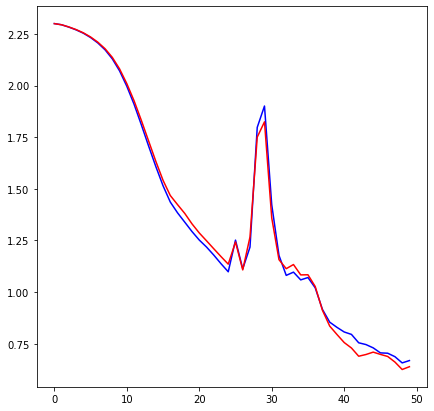

In [5]:
import torch.nn as nn
import torch.nn.functional as F
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,300)
        self.fc2 = nn.Linear(300,100)
        self.fc3 = nn.Linear(100,10)
    
        
    def forward(self,x):
        x = x.view(x.shape[0],-1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(x,dim=1)
        return x
    
net = Classifier()    
import torch.optim as optim
#criterion = torch.nn.MSELoss()
criterion = torch.nn.NLLLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9)
epochs = 50
net.train()
train_history = []
val_history = []
best_loss = 1e5
early_stopping = 0 
for e in range(epochs):
   optimizer.zero_grad()
   pred = net(X_train)
   loss = criterion(pred,y_train)
   val_loss = criterion(net(X_valid),y_valid) ## what does this line do?
   loss.backward()
   optimizer.step()
   train_history.append(loss.item())
   val_history.append(val_loss.item())
   if val_loss < best_loss:
      early_stopping = 0
      best_loss = val_loss
      torch.save(net.state_dict(), 'fashion_MNIST' + '.t7')  #what does this line do?
   else:
      early_stopping += 1     
   if early_stopping == 50:  # what does this line do?
       break
   print('Epoch: {} \t Training loss: {:.6f} \t Validation loss: {:.6f}'.format(e,loss.item(), val_loss.item()))
plt.figure(figsize=(7,7))
plt.plot(train_history, 'b', val_history,'r')
net.load_state_dict(torch.load('fashion_MNIST' + '.t7')) # what does this line do?
print(f'test accuracy {model_evaluate(net,X_test,y_test)}') # what does this line do?

&#9989; <font color=red>**QUESTION:**</font> Last time,  you see an improvement in the test accuracy? Discuss with your groupmates compared to the result you obtained last time, how much of improvement you got from the use of more training data and SGD?

&#9989; <font color=red>**QUESTION:**</font> Last time, we saw that by tuning the hyperparamters, we can increase the performance of the model. 
  - the number of layers
  - number of nodes in each layer
  - learning rate
  - epochs
  - number of training samples
  - other types of activations
You can also try these on SGD. What is the best result you got? 
  

&#9989; <font color=red>**QUESTION:**</font> Why are the results differ each time we build model with the __SAME__ hypeparameters? [Here is a nice post on this topic](https://machinelearningmastery.com/randomness-in-machine-learning/). In our case, what do you think the reasons are?

Who has the best results? Let's all use the same parameters based on the best result. Can you reproduce the results?

# 2. Other tricks to increase the test performances.

## 2.1  Weight initialization

&#9989; **<font color=blue>DO THIS:</font>** During the forward propagration step, weights are randomly initialized by default. But there are many other alternatives: 

In [12]:
def weights_init_uniform(m):
        classname = m.__class__.__name__
        # for every Linear layer in a model..
        if classname.find('Linear') != -1:
            # apply a 
            m.weight.data.uniform_(0.0, 1.0) # use uniform distribution to initialize the weights
           # m.weight.data.normal_(0,1) # use Gaussian distribution to initialize the weights 
            m.bias.data.fill_(0) #set the bias to 0, can also set it to a uniform or a Gaussian distribution 
                                 # using the commands: "m.bias.data.uniform_(0,1)"  or "m.bias.data.normal_(0,1)
model_uniform = Classifier()
model_uniform.apply(weights_init_uniform)

Classifier(
  (fc1): Linear(in_features=784, out_features=1024, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (fc2): Linear(in_features=1024, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=100, bias=True)
  (fc4): Linear(in_features=100, out_features=10, bias=True)
  (bn): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [10]:
Classifier()

Classifier(
  (fc1): Linear(in_features=784, out_features=300, bias=True)
  (fc2): Linear(in_features=300, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)

&#9989; **<font color=blue>DO THIS:</font>** Run the following code to check if the weights are indeed between 0 and 1 and the bias are indeed 0  

In [61]:
for paras in model_uniform.parameters():
    print(paras)

Parameter containing:
tensor([[0.1008, 0.0814, 0.7445,  ..., 0.3649, 0.4376, 0.2043],
        [0.6273, 0.2069, 0.0986,  ..., 0.9904, 0.7099, 0.7384],
        [0.3045, 0.2031, 0.3928,  ..., 0.4503, 0.7710, 0.1403],
        ...,
        [0.0505, 0.6085, 0.9118,  ..., 0.8913, 0.6100, 0.8934],
        [0.6887, 0.7125, 0.9216,  ..., 0.4825, 0.3155, 0.1152],
        [0.8946, 0.6694, 0.4096,  ..., 0.4409, 0.4152, 0.9059]],
       requires_grad=True)
Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.,

&#9989; **<font color=blue>DO THIS:</font>** Try different initializer to see which one is the best for our problem:


In [74]:
#put your code here
import torch.nn as nn
import torch.nn.functional as F
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,1000)
        self.fc2 = nn.Linear(1000,100)
        self.fc3 = nn.Linear(100,10)
    
        
    def forward(self,x):
        x = x.view(x.shape[0],-1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(x,dim=1)
        return x
    
def model_evaluate(net, X_test,y_test):
      pred = net(X_test.float())
      corrects = 0
      for i in range(len(pred)):
            pred_label = pred[i].argmax()
            if pred_label == y_test[i]:
                corrects += 1
      return corrects/len(pred)

net = Classifier()    
import torch.optim as optim
criterion = torch.nn.NLLLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9)
epochs = 200
batch_size = 200  # what does this line do?
n_batch = int(10000/batch_size)
net.train()
train_history = []
best_loss = 1e3
early_stopping = 0
for e in range(epochs):
    running_loss = 0  # what does this line do?
    for i in range(1,n_batch):
       optimizer.zero_grad()
       pred = net(X_train[i*batch_size:(i+1)*batch_size]) # what does this line do?
       loss = criterion(pred,y_train[i*batch_size:(i+1)*batch_size]) # what does this line do?
       val_loss = criterion(net(X_valid),y_valid) ## what does this line do?
       loss.backward()
       optimizer.step()
       running_loss += loss.item()
#      train_history.append(loss.item())
#      train_history.append(running_loss.item())
       if val_loss < best_loss:
        early_stopping = 0
        best_loss = val_loss
        torch.save(net.state_dict(), 'fashion_MNIST' + '.t7')  #what does this line do?
       else:
        early_stopping += 1      
       if early_stopping == 50: # what does this line do?
        break # what does this line do?
    print('Epoch: {} \t Training loss: {:.6f}'.format(e,running_loss))
print(f'test accuracy {model_evaluate(net,X_test,y_test)}')

Epoch: 0 	 Training loss: 73.687531
Epoch: 1 	 Training loss: 47.357216
Epoch: 2 	 Training loss: 43.177289
Epoch: 3 	 Training loss: 41.140276
Epoch: 4 	 Training loss: 39.859782
Epoch: 5 	 Training loss: 39.635213
Epoch: 6 	 Training loss: 38.709962
Epoch: 7 	 Training loss: 37.918172
Epoch: 8 	 Training loss: 20.747696
Epoch: 9 	 Training loss: 36.910290
Epoch: 10 	 Training loss: 11.052735
Epoch: 11 	 Training loss: 33.459856
Epoch: 12 	 Training loss: 26.994488
Epoch: 13 	 Training loss: 26.868946
Epoch: 14 	 Training loss: 9.615759
Epoch: 15 	 Training loss: 26.144111
Epoch: 16 	 Training loss: 25.418871
Epoch: 17 	 Training loss: 2.997441
Epoch: 18 	 Training loss: 24.504092
Epoch: 19 	 Training loss: 1.023871
Epoch: 20 	 Training loss: 24.475981
Epoch: 21 	 Training loss: 23.436899
Epoch: 22 	 Training loss: 22.630780
Epoch: 23 	 Training loss: 6.631862
Epoch: 24 	 Training loss: 22.883713
Epoch: 25 	 Training loss: 22.341024
Epoch: 26 	 Training loss: 22.072666
Epoch: 27 	 Tra

## 2.2 Deeper with dropouts

In section 2.1, we change the architecture by changing the number of nodes. But we can also change the architecture by:
- Changing the number of hidden layers:
  - A deeper network allows us to learn more complicated patterns from features.
  - But it lead to model overfitting.
- Dropout:
  - This means randomly ignoring a subset of neurons during training.
  - As training went on, weights are learned but can become too specific and lead to overfitting.
  - By dropping such nodes on occasion can provide opportunities to "deemphasize" such neurons. 
- Bypassing and concatenate layers: [the general idea of wide & deep learning](https://ai.googleblog.com/2016/06/wide-deep-learning-better-together-with.html) which we won't go into but the general idea is captured here:

<img src= "https://2.bp.blogspot.com/-wkrmRibw_GM/V3Mg3O3Q0-I/AAAAAAAABG0/Jm3Nl4-VcYIJ44dA5nSz6vpTyCKF2KWQgCKgB/s1600/image03.png" width="80%">



  

&#9989; **<font color=blue>DO THIS:</font>** The following code applies a dropout on the first hidden layer. 
- The dropout function is defined in the torch.nn module
- The first argument of the dropout function  is the dropout rate, which is the percentage of neurons that are randomly ignored
- The layer with dropout has the same number of nodes as before, so dropout does not change actually delete neurons.
- Pick a dropout rate from [0,0.1,0.3,0.5].
- During testing, one must turn off the dropout by running the command `model.eval()`.

In [13]:
# put your code below
import torch.nn as nn
import torch.nn.functional as F
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,1000)
        self.dropout = nn.Dropout(p=0.2)

        self.fc2 = nn.Linear(1000,100)
        self.fc3 = nn.Linear(100,10)
        
    def forward(self,x):
        x = x.view(x.shape[0],-1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(x,dim=1)
        return x
    
net = Classifier()    
criterion = torch.nn.NLLLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9)
epochs = 40
batch_size = 100 
n_batch = int(10000/batch_size)
net.train()
for e in range(epochs):
    running_loss = 0  # what does this line do?
    for i in range(1,n_batch):
       optimizer.zero_grad()
       random_ind = np.random.randint(0,10000,batch_size) 
       pred = net(X_train[i*batch_size:(i+1)*batch_size]) # what does this line do?
       loss = criterion(pred,y_train[i*batch_size:(i+1)*batch_size]) # what does this line do?
       loss.backward()
       optimizer.step()
       running_loss += loss.item() # what does this line do?
    print('Epoch: {} \t Training loss: {:.6f}'.format(e,running_loss))

Epoch: 0 	 Training loss: 105.979737
Epoch: 1 	 Training loss: 55.747637
Epoch: 2 	 Training loss: 47.959261
Epoch: 3 	 Training loss: 45.009628
Epoch: 4 	 Training loss: 41.985155
Epoch: 5 	 Training loss: 41.195458
Epoch: 6 	 Training loss: 39.432713
Epoch: 7 	 Training loss: 36.575193
Epoch: 8 	 Training loss: 36.475594
Epoch: 9 	 Training loss: 35.855369
Epoch: 10 	 Training loss: 34.713529
Epoch: 11 	 Training loss: 33.653017
Epoch: 12 	 Training loss: 34.519811
Epoch: 13 	 Training loss: 33.337391
Epoch: 14 	 Training loss: 30.376805
Epoch: 15 	 Training loss: 30.733886
Epoch: 16 	 Training loss: 29.829733
Epoch: 17 	 Training loss: 29.618771
Epoch: 18 	 Training loss: 28.487016
Epoch: 19 	 Training loss: 27.843759
Epoch: 20 	 Training loss: 26.563478
Epoch: 21 	 Training loss: 27.447069
Epoch: 22 	 Training loss: 25.853743
Epoch: 23 	 Training loss: 25.071038
Epoch: 24 	 Training loss: 25.153135
Epoch: 25 	 Training loss: 24.891351
Epoch: 26 	 Training loss: 23.826770
Epoch: 27 

In [14]:
net.eval()
model_evaluate(net, X_test,y_test)

0.7927

&#9989; **<font color=blue>DO THIS:</font>** Let's look at the model sumary. By adding the dropout layers, do we add any parameters?

In [17]:
import numpy as np
np.random.randint(1,100)

98

In [16]:
model.summary()

NameError: name 'model' is not defined

## ---
<a name="architecture"></a>
# 2.3 Batch normalization

ANN has an insane number of hyperparameters to tune. Aside from network architecture, you also need to tune a few other things to take care of the __unstable gradient problems__:
1. _Vanishing gradient:_
   * Gradients get smaller as the algorithm processes down to the lower (deeper) layers.
   * As a result, lower layers' connection weights virtually unchanged and training never converge to a good solution.
2. _Exploding gradient:_
   * Gradients get bigger until very large weight updates.
   * This results in a unstable model that is unable to learn anything from the data.

Why do they happen?
* The variance of the output of each layer is much greater than the variance of its inputs.
  * This lead to super small or super large gradients as one goes deeper.
* This can be due to the choice of:
  * Activation function - E.g. Logistic and sigmoid functions will saturate at 0 or 1 when inputs become highly positive or negative, and thus derivatives are extremely close to 0 (slope=0), so no gradient.
  * Weight initialization scheme - instead of doing it randomly, some other approaches should be used.



Three common approaches for dealing with vanishing gradient problems are to:
- Pick a good weight initialization scheme, we have done that.
- Use a good activation function (`ReLU`, Rectified Linear Unit, we have used turns out to be an excellent one).
- Apply __batch noramlization__.

What is batch normalization:
- ANN trainining is done in __batches__, i.e., sets of instances. 
- Batch normalization makes sure that the the inputs to the next layer are normalized so they do not contribute to near-zero gradients.

Good:
- Control for vanishing gradient problem.
- Can use much larger learning rates that speed up learning.
- Act like a regularizer that reduce overfitting.

Not so good:
- Need to learn addition paramters - so predction is slower.

&#9989; **<font color=blue>DO THIS:</font>** In the following cell, a 1d batch normalization layer is added on top of Dropout. Did it do better?

In [80]:
import torch.nn as nn
import torch.nn.functional as F
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,1000)
        self.dropout = nn.Dropout(p=0.2, inplace=False)
        self.fc2 = nn.Linear(1000,100)
        self.fc3 = nn.Linear(100,10)
        self.bn = nn.BatchNorm1d(100)
        
    def forward(self,x):
        x = x.view(x.shape[0],-1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.bn(self.dropout(F.relu(self.fc2(x))))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(x,dim=1)
        return x
    
net = Classifier()    
criterion = torch.nn.NLLLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9)
epochs = 100
batch_size = 100 
n_batch = int(10000/batch_size)
net.train()
for e in range(epochs):
    running_loss = 0  # what does this line do?
    for i in range(1,n_batch):
       optimizer.zero_grad()
       random_ind = np.random.randint(0,10000,batch_size) 
       pred = net(X_train[i*batch_size:(i+1)*batch_size]) # what does this line do?
       loss = criterion(pred,y_train[i*batch_size:(i+1)*batch_size]) # what does this line do?
       loss.backward()
       optimizer.step()
       running_loss += loss.item() # what does this line do?
    print('Epoch: {} \t Training loss: {:.6f}'.format(e,running_loss))

Epoch: 0 	 Training loss: 85.516014
Epoch: 1 	 Training loss: 62.863908
Epoch: 2 	 Training loss: 56.994110
Epoch: 3 	 Training loss: 50.461396
Epoch: 4 	 Training loss: 47.351527
Epoch: 5 	 Training loss: 44.870660
Epoch: 6 	 Training loss: 42.287228
Epoch: 7 	 Training loss: 41.166245
Epoch: 8 	 Training loss: 40.281705
Epoch: 9 	 Training loss: 38.277014
Epoch: 10 	 Training loss: 38.636001
Epoch: 11 	 Training loss: 37.378062
Epoch: 12 	 Training loss: 36.454071
Epoch: 13 	 Training loss: 34.270339
Epoch: 14 	 Training loss: 34.434605
Epoch: 15 	 Training loss: 33.124209
Epoch: 16 	 Training loss: 33.969898
Epoch: 17 	 Training loss: 33.197911
Epoch: 18 	 Training loss: 32.615970
Epoch: 19 	 Training loss: 31.241065
Epoch: 20 	 Training loss: 31.445157
Epoch: 21 	 Training loss: 30.745724
Epoch: 22 	 Training loss: 30.241506
Epoch: 23 	 Training loss: 29.037143
Epoch: 24 	 Training loss: 29.952226
Epoch: 25 	 Training loss: 27.882622
Epoch: 26 	 Training loss: 28.627537
Epoch: 27 	

In [82]:
net.eval()
model_evaluate(net, X_test,y_test)

0.819

---
<a name="together"></a>
# 4. Putting things together and a small competition

&#9989; **<font color=blue>DO THIS:</font>** Try to combine all that you have learned (early stopping, SGD, dropout, batch normalizaiton, hyper-parameter tuning) to make the best out of the first 10,000 training samples of the FashionMNIST dataset.

In [21]:
import torch.nn as nn
import torch.nn.functional as F
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,1024)
        self.dropout = nn.Dropout(p=0.1, inplace=False)
        self.fc2 = nn.Linear(1024,300)
        self.fc3 = nn.Linear(300,10)
        self.bn = nn.BatchNorm1d(100)
        
    def forward(self,x):
        x = x.view(x.shape[0],-1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.bn(self.dropout(F.relu(self.fc2(x))))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(x,dim=1)
        return x
    
net = Classifier()    
criterion = torch.nn.NLLLoss()
optimizer = optim.SGD(net.parameters(), lr=0.4, momentum=0.8)
epochs = 300
batch_size = 100 
n_batch = int(10000/batch_size)
net.train()
for e in range(epochs):
    running_loss = 0  # what does this line do?
    for i in range(1,n_batch):
       optimizer.zero_grad()
       pred = net(X_train[i*batch_size:(i+1)*batch_size]) # what does this line do?
       loss = criterion(pred,y_train[i*batch_size:(i+1)*batch_size]) # what does this line do?
       val_loss = criterion(net(X_valid),y_valid) ## what does this line do?
       loss.backward()
       optimizer.step()
       running_loss += loss.item()
       if val_loss < best_loss:
        early_stopping = 0
        best_loss = val_loss
        torch.save(net.state_dict(), 'fashion_MNIST' + '.t7')  #what does this line do?
       else:
        early_stopping += 1      
       if early_stopping == 50: # what does this line do?
        break # what does this line do?
    print('Epoch: {} \t Training loss: {:.6f}'.format(e,running_loss))
print(f'test accuracy {model_evaluate(net,X_test,y_test)}')

Epoch: 0 	 Training loss: 80.750541
Epoch: 1 	 Training loss: 59.227379
Epoch: 2 	 Training loss: 51.027336
Epoch: 3 	 Training loss: 46.426991
Epoch: 4 	 Training loss: 43.673628
Epoch: 5 	 Training loss: 43.356180
Epoch: 6 	 Training loss: 40.451952
Epoch: 7 	 Training loss: 38.202967
Epoch: 8 	 Training loss: 37.794192
Epoch: 9 	 Training loss: 36.680794
Epoch: 10 	 Training loss: 34.442626
Epoch: 11 	 Training loss: 33.443024
Epoch: 12 	 Training loss: 34.780695
Epoch: 13 	 Training loss: 32.163842
Epoch: 14 	 Training loss: 31.639104
Epoch: 15 	 Training loss: 30.821375
Epoch: 16 	 Training loss: 30.351664
Epoch: 17 	 Training loss: 28.959135
Epoch: 18 	 Training loss: 29.372674
Epoch: 19 	 Training loss: 28.953584
Epoch: 20 	 Training loss: 27.324806
Epoch: 21 	 Training loss: 26.460554
Epoch: 22 	 Training loss: 26.630388
Epoch: 23 	 Training loss: 25.664160
Epoch: 24 	 Training loss: 25.131766
Epoch: 25 	 Training loss: 24.134293
Epoch: 26 	 Training loss: 23.792086
Epoch: 27 	

&#9989; **<font color=red>QUESTION:</font>**  Report the best classfication accracy your model can achieve [the Google sheet](https://docs.google.com/spreadsheets/d/18zfhKed3VbWuMjTXtyrwuJel0rwmJLPMtlNJFhblvhs/edit?usp=sharing) and the winner gets 5% bonus on the semester project!

<font size=+3>&#9998;</font> Best classification accuracy achieved: 0.8444 (# Try 13)

-----
### Congratulations, we're done!